In [ ]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import AnnData
import scanpro as sp
from scanpro import scanpro

In [ ]:
# Load count matrix (genes × cells) and transpose it to (cells × genes)
counts = pd.read_csv("merged_counts_matrix.csv", index_col=0).T
counts.index = counts.index.str.lstrip("V")  # Remove "V" prefix

# Load metadata
metadata = pd.read_csv("merged_metadata.csv", index_col=0)

# Load gene names
genes = pd.read_csv("merged_genes.csv")["genes"].values

# Ensure gene names match the columns of the count matrix
counts.columns = genes

# Create AnnData object
adata = AnnData(X=counts, obs=metadata, var=pd.DataFrame(index=genes))

# Save as H5AD for ScanPro
adata.write("converted_scanpro_data.h5ad")

In [ ]:
# Define metadata columns
condition_col = "orig"  # Adjust based on `metadata_df.columns`
celltype_col = "cell_type_annotation"  # Adjust based on `metadata_df.columns`

adata = adata[~adata.obs[celltype_col].isna()]  # Remove NAs from the column

# Run single replicate proportion testing
results = scanpro(adata, conds_col=condition_col, clusters_col=celltype_col)

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 3 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 5.35 seconds


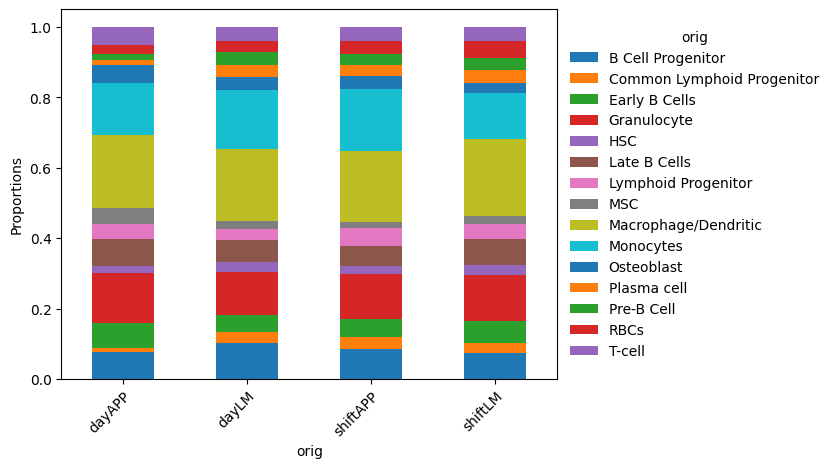

In [11]:
results.results
results.plot_samples(stacked=True)